In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import time 

import torch
import mrmr
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [2]:
# Constants
DATA_PATH = './data/'
DATASET_PATH = DATA_PATH + 'uci-data/'
MODELS_PATH = DATA_PATH + 'models/'

In [3]:
# Loading functions
def load_data_frame(txt):
    return pd.read_csv(DATASET_PATH + txt + '.txt', header=None, sep='\s+')

In [4]:
# Loading data
train_set = load_data_frame('Train/X_train')
test_set = load_data_frame('Test/X_test')

features = []
with open(DATASET_PATH + 'features.txt') as f:
    for line in f:
        feat = line.strip()
        features.append(feat)

train_set.columns = features
test_set.columns = features

train_set['subjectId'] = load_data_frame('Train/subject_id_train')
train_set['activity'] = load_data_frame('Train/y_train')

test_set['subjectId'] = load_data_frame('Test/subject_id_test')
test_set['activity'] = load_data_frame('Test/y_test')

activity_labels = load_data_frame('activity_labels')
activity_labels.columns = ['id', 'activity']

features = train_set.columns.tolist()

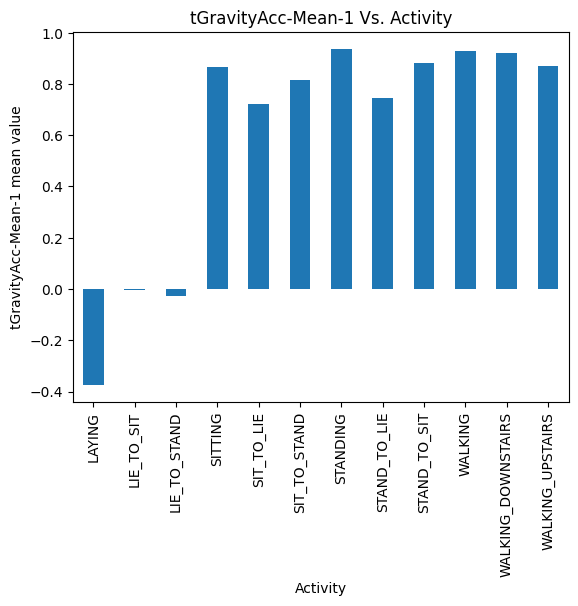

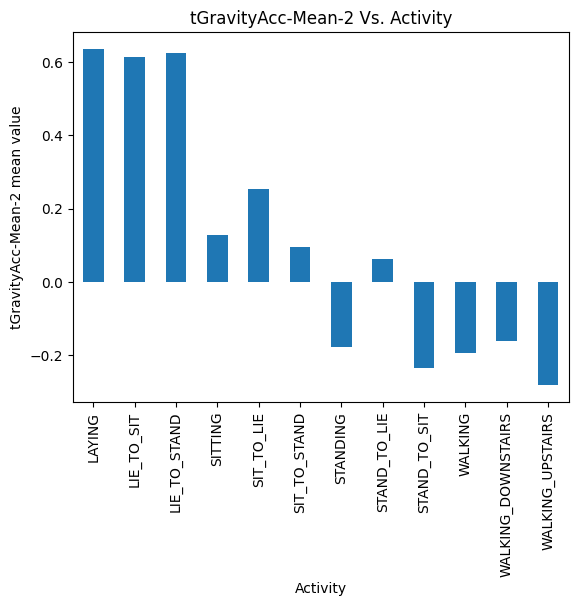

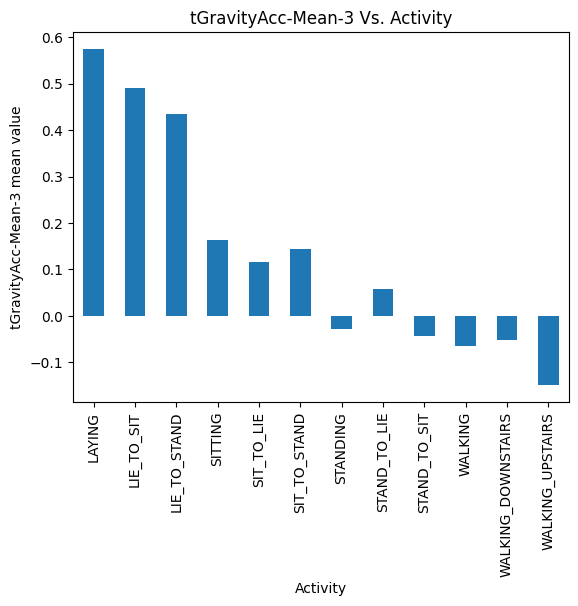

In [5]:
# Graphing features
complete_set_train = train_set.copy()
for x in activity_labels['id']:
    complete_set_train['activity'] = complete_set_train['activity'].replace(x, activity_labels['activity'][x - 1])

selected_features_graph = ['tGravityAcc-Mean-1', 'tGravityAcc-Mean-2', 'tGravityAcc-Mean-3']

for selected_feature in selected_features_graph:
    if selected_feature != '':
        train_subset = complete_set_train[[selected_feature, 'activity']]
        grouped_train_by_feature = train_subset.groupby('activity').mean()

        grouped_train_by_feature.plot(kind='bar', legend=False)
        plt.title(selected_feature + ' Vs. Activity')
        plt.xlabel('Activity')
        plt.ylabel(selected_feature + ' mean value')
        plt.show()